In [7]:
#basic package
import tqdm
import os
import numpy as np
import glob
import pandas as pd
import sys
import time
import datetime as dt
import itertools
import re
import math
from collections import Counter
import operator
from scipy import stats
import random
import pickle
from scipy.stats import pearsonr, spearmanr
#repeated measures correlation
import pingouin as pg
from sklearn.utils import shuffle
import random

#kmeans
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing #StandardScaler

#plot
import joypy # for ridgeplot
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
PACKAGE_PARENT = '../'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser('__file__'))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))
import config_origins as config

In [9]:
path_extracted_data = config.path_extracted_data
id_run = config.id_run

## Download data

In [10]:
#Raw
df_rawweight = pd.read_csv(os.path.join(path_extracted_data,'df_hablups.csv'), sep=',')
print(df_rawweight.shape)
display(df_rawweight.head(3))

(795, 6)


,HenID,weight,DIB,FeatherDamage,severity,DOA
0,hen_10,1070.0,0.0,0.0,0,NaN
1,hen_101,1082.0,0.0,0.0,0,NaN
2,hen_102,1158.0,0.0,0.0,0,NaN


In [11]:
#Estimated
df_estiamtedweight = pd.read_csv(os.path.join(path_extracted_data,'EstimatedHA.csv'), sep=',')
print(df_estiamtedweight.shape)
display(df_estiamtedweight.head(3))

(810, 4)


,HenID,DIB,predictedWeight,predictedKBF
0,hen_10,0,1105.243038,-0.511350
1,hen_101,0,1150.990246,-0.158789
2,hen_102,0,1263.669263,-0.968745


## Visual

predictedWeight weight


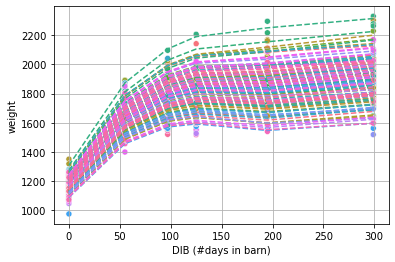

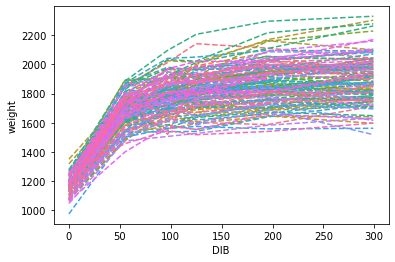

predictedKBF severity


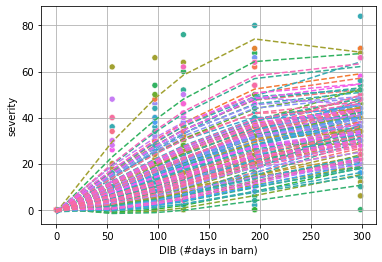

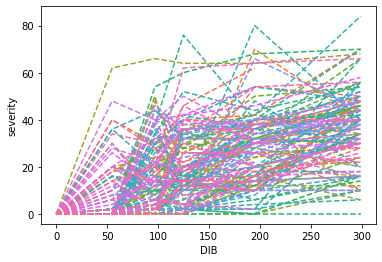

In [13]:
for hapred,haraw in zip(['predictedWeight','predictedKBF'],['weight','severity']):
    #sns.set(rc={'figure.figsize':(6.5,5)})
    #sns.set_theme(style="ticks", font_scale=1.25)
    print(hapred,haraw)
    sns.scatterplot(x='DIB', y=haraw, data=df_rawweight, hue='HenID', legend=False, alpha=1);
    sns.lineplot(x='DIB', y=hapred, data=df_estiamtedweight, hue='HenID', linestyle="dashed", legend=False, alpha=1);
    #remove all borders
    #sns.despine(bottom = True, left = True)
    #plt.title('Individual plasticity');
    plt.grid()
    plt.xlabel('DIB (#days in barn)')
    plt.savefig(os.path.join(path_extracted_data,'RawAdnEstimatedM'+haraw+'.png'), bbox_inches='tight')
    plt.show()
    sns.lineplot(x='DIB', y=haraw, data=df_rawweight, hue='HenID', linestyle="dashed", legend=False, alpha=1)
    plt.show();